In [76]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import tensorflow as tf
import keras
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

### Specify data location

In [23]:
basedir = os.path.dirname(os.path.abspath(" __file__"))
image_folder = os.path.join(basedir, "horse-or-human")
train_horses_dir = os.path.join(image_folder, "horses")
train_humans_dir = os.path.join(image_folder, "humans")

In [46]:
os.path.abspath(" __file__")

'C:\\Users\\sreej\\Desktop\\Jupyter_Notebook\\TensorFlow\\ __file__'

### Get number of images from each class

In [24]:
print(f"Number of images of horse: {len(os.listdir(train_horses_dir))}")
print(f"Number of images of humans: {len(os.listdir(train_humans_dir))}")

Number of images of horse: 500
Number of images of humans: 527


### Plot random images

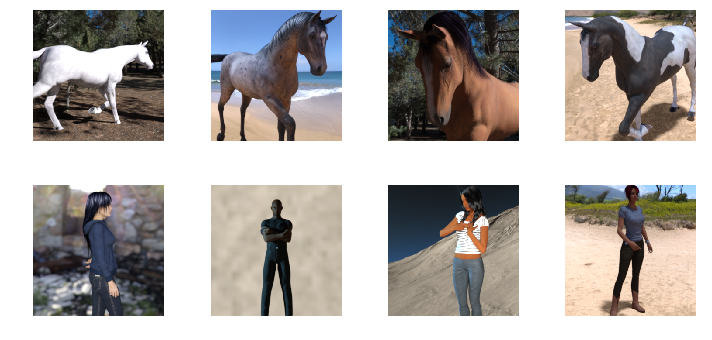

In [64]:
rand_int_horse = np.random.randint(0, len(os.listdir(train_horses_dir)), 4)
rand_int_humans = np.random.randint(0, len(os.listdir(train_humans_dir)), 4)

fig, axes = plt.subplots(2,4,figsize=(10,5))

for index, (horse_ind, human_ind) in enumerate(zip(rand_int_horse, rand_int_humans)):
    image_path_horse = os.path.join(train_horses_dir, os.listdir(train_horses_dir)[horse_ind])
    image_horse = mpimg.imread(image_path_horse)
    axes[0, index].imshow(image_horse)
    axes[0, index].axis("off")
    
    image_path_human = os.path.join(train_humans_dir, os.listdir(train_humans_dir)[human_ind])
    image_human = mpimg.imread(image_path_human)
    axes[1, index].imshow(image_human)
    axes[1, index].axis("off")
    
plt.tight_layout()


### Create a model

In [71]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300, 300, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(528, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")    
])

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [75]:
model.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=0.001), metrics=["acc"])

### Import images with ImageDataGenerator

In [ ]:
rain_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


In [78]:
image_generator = ImageDataGenerator(rescale=1/255)
train_generator = image_generator.flow_from_directory(image_folder, 
                    target_size=(300,300), batch_size=128, class_mode="binary")

Found 1027 images belonging to 2 classes.


In [77]:
image_folder

'C:\\Users\\sreej\\Desktop\\Jupyter_Notebook\\TensorFlow\\horse-or-human'

### Train on the train_image_generator

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=8, epochs=15, verbose=1)